# Module 7: Linear and Multiple Regressions

The field of Data Science incorporates many different domains like Statistics, Linear Algebra, Machine Learning, Databases and merges them in the most meaningful way possible using statistical algorithms


One such very primitive statistical algorithm is **Linear Regression**.  Understanding the principle behind the working of linear regression is very important as to reason the evolution of a whole class of statistical algorithms called **Generalized Linear Models**.


## Understanding a regression problem

Regression belongs to the class of **Supervised Learning** tasks where the datasets that are used for predictive/statistical modeling contain continuous labels. But, let's define a regression problem more mathematically.

Suppose that we want to predict how housing price is related to housing features.


| Living Area (ft^2) - X | Number of bedrooms  | Price - y
| --- | ----------- |--------------|
| 2104 |3 | 400|
| 1600 | 3 | 330|
| 2400 | 3 |378|
| 1416 | 2 | 232|

Suppose `X` is the set of values that correspond to the living areas of various houses (also considered as the space of input values) and `y` is the price of the respective houses but note that these values are predicted by `h`. `h` is the function that maps the `X` values to `y`(often called as predictor). For historical reasons, this `h` is referred to as a hypothesis function. Keep in mind that, this dataset has only featured, i.e., the living areas of various houses and consider this to be a toy dataset for the sake of understanding.


**In general, these methods are used to predict the value of a response (dependent) variable from one or more predictor (independent) variables, where the variables are numeric.**

## Linear Regression - how it works?


Linear regression is perhaps one of the most well known and well-understood algorithms in statistics and machine learning. Linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but with the course of time, it has become an integral part of modern machine learning toolbox.

Let's have a toy dataset for it. You will use the same house price prediction dataset to investigate this but this time with two features. The task remains the same i.e., predicting the house price.


As mentioned earlier, now the `x`’s are two-dimensional which means your dataset contains two features. For instance, $x_1(i)$ is the living area of the i-th house in the training set, and $x_2(i)$ is its number of bedrooms.
To perform regression, you must decide the way you are going to represent `h`. As an initial choice, let’s say you decide to approximate `y` as a linear function of `x`:

$$y = mx +b$$


**Single LR**
$$y = \theta_0 + \theta_1x_1 $$


**Multiple LR**
$$y = \theta_0 + \theta_1x_1 +\theta_2x_2$$

Here, the $\theta_i$’s are the parameters (also called **weights**) parameterizing the space of linear functions mapping from `X` to `y`.


# Simple linear regression

In [48]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

# Downloading the Data

In [49]:
df = pd.read_csv('data/score.csv')

# Exploratory Data Analysis

In [50]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [51]:
df.shape

(25, 2)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [53]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [54]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The greater the absolute value of the correlation coefficient, the stronger the relationship.

##### Hours and Scores

Let's visualize the relationship between "hours" and "score" using a scatter plot. Each point in the scatter plot represents one student.

<Axes: xlabel='Hours', ylabel='Scores'>

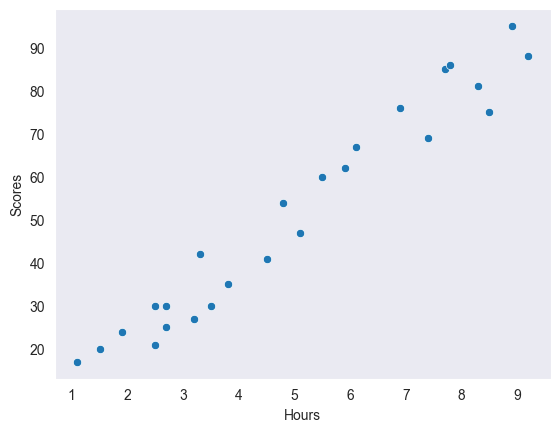

In [55]:
sns.scatterplot(data=df, x="Hours", y="Scores")

Observation: The general trend seems to be that scores  increase with hours.


### Linear Regression using Scikit-learn

##### Splitting data for the training

In [56]:
inputs = df.drop(columns = ['Scores'], axis = 1, inplace=False) # input is hours (X)
targets = df.drop(columns = ['Hours'], axis = 1, inplace=False) # output is scores (y)

In [57]:
inputs.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [58]:
targets.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [59]:
train_inputs,test_inputs, train_targets, test_targets = train_test_split( inputs, targets, test_size=0.2, random_state=42)

##### Training Model

First, we create a new model object.

In [60]:
model=LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

In [61]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.


Note that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [62]:
print('train_inputs.shape: ', train_inputs.shape)
print('train_targets.shape: ',train_targets.shape)

train_inputs.shape:  (20, 1)
train_targets.shape:  (20, 1)


Let's fit the model to the data.

In [63]:
model.fit(train_inputs, train_targets)

LinearRegression()

$$y = \theta_1 + \theta_0x$$

In [64]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [[9.68207815]]
Intercept of the model:  [2.82689235]


Let compute the predictions for the entire set of inputs

In [65]:
test_predictions=model.predict(test_inputs)

In [66]:
test_predictions

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

We can plot predicted scores using a line graph 

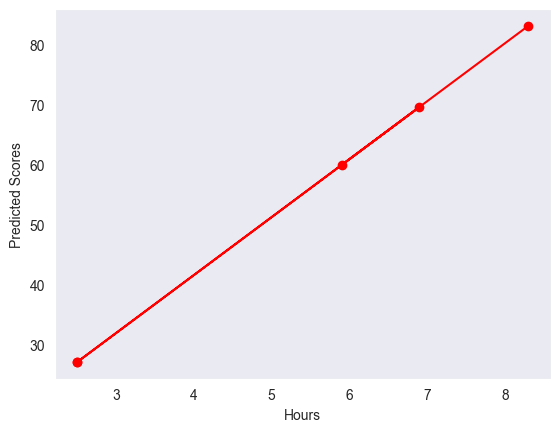

In [67]:
plt.plot(test_inputs,test_predictions, 'r-o');
plt.xlabel('Hours');
plt.ylabel('Predicted Scores');

We can overlay this line on the actual data, so see how well our model fits the data.

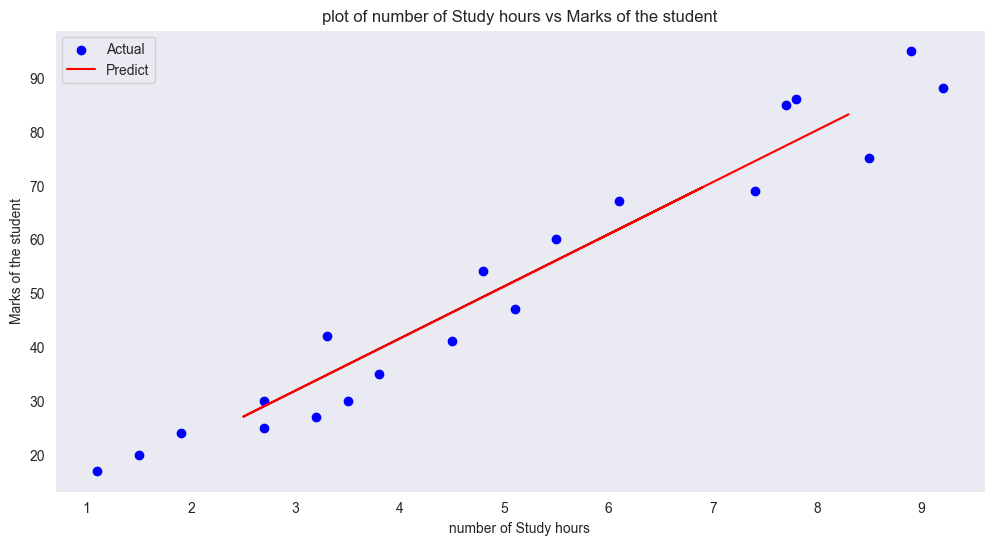

In [68]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(train_inputs, train_targets, color='blue')
plt.plot(test_inputs, test_predictions,color='red')
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")
plt.legend(['Actual','Predict']);

Compute Accuracy and RMSE to evalute the model

In [69]:
#accuracy of train data
score = model.score(train_inputs, train_targets)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(test_targets,test_predictions)), 2))

Accuracy:  94.91
RMSE:      4.35


##### Model evaluation

In [70]:
test_predictions=model.predict(test_inputs)

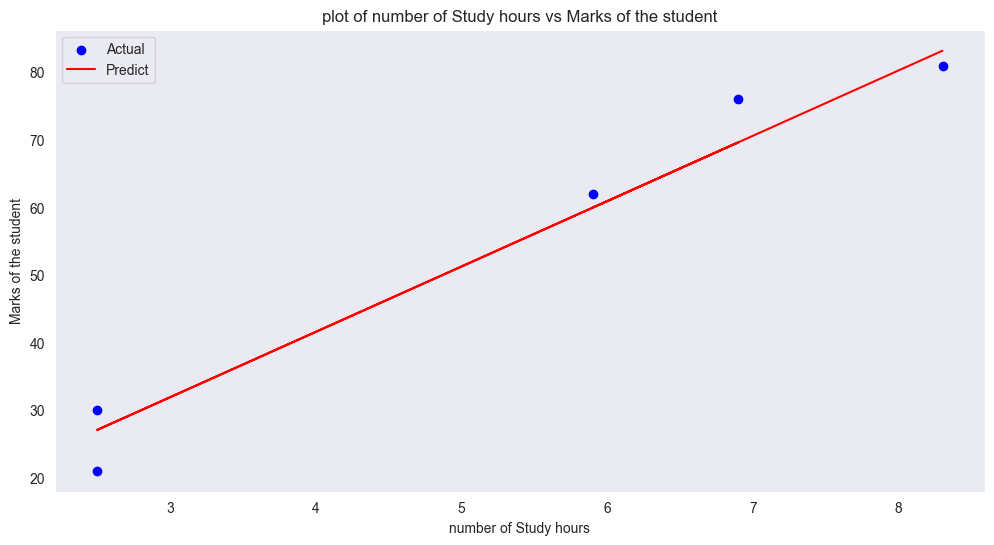

In [71]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(test_inputs, test_targets, color='blue')
plt.plot(test_inputs, test_predictions,color='red')
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")
plt.legend(['Actual','Predict']);

##### Evaluate the accuracy of the model

In [72]:
#accuracy of test data
score = model.score(test_inputs, test_targets)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(test_targets,test_predictions)), 2))

Accuracy:  96.78
RMSE:      4.35


##### Prediciton

In [73]:
print("Marks of student who studied 10 hours a day:  ", model.predict([[10]]))

Marks of student who studied 10 hours a day:   [[99.6476739]]


In [74]:
print("Marks of student who studied 9.25 hours a day:  ", model.predict([[9.25]]))

Marks of student who studied 9.25 hours a day:   [[92.38611528]]


### Conclusion

From the above data and models, it shows that the more time spent studying, the higher the score will be. So keep studying.

## Multiple linear regression

In [75]:
#import libraries
from sklearn import datasets

## if this doesn't work in a terminal run: pip install openpyxl

house = pd.read_excel('data/Maison.xlsx') ## Reading the data

Scikit-learn provides a handy description of the dataset, and it can be easily viewed by:


In [76]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [77]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [78]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


<Axes: xlabel='area', ylabel='price'>

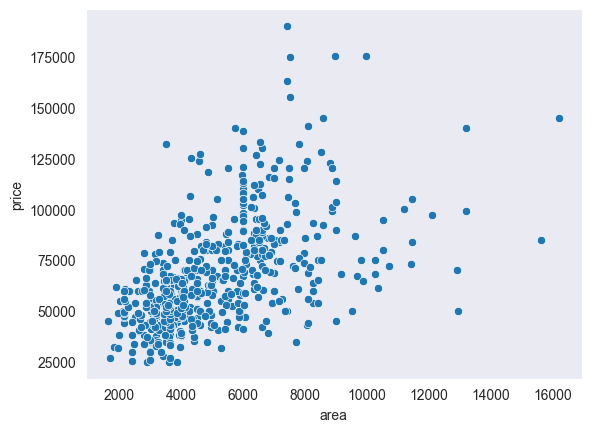

In [79]:
# Let's now do some visualizations. 
# Let's see ig we have a linear relation between price and area
sns.scatterplot(x = house['area'], y = house['price'],  palette = 'viridis')

### Correlation

In [80]:
df_corr = house.corr()

<Axes: >

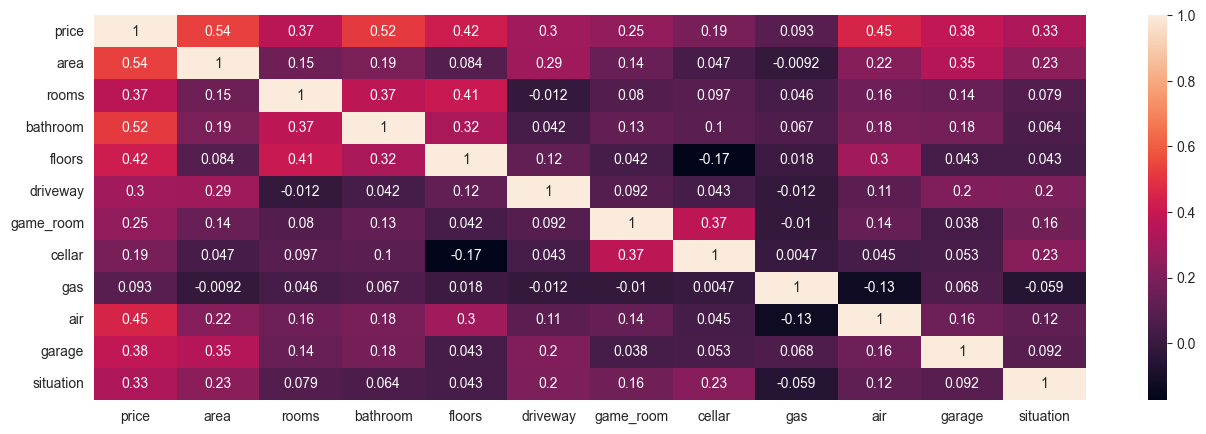

In [81]:
plt.figure(figsize = (16,5))
sns.heatmap(data  = df_corr, annot = True)

Remember:

- **Linear Assumption**: Linear regression is best employed to capture the relationship between the input variables and the outputs. In order to do so, linear regression assumes this relationship to be linear (which might not be the case all the time). Remember that you can always transform your data so that a linear relationship is maintained. For example, if your data has an exponential relationship, you can apply log-transform to make the relationship linear. 



Let's do some hands-on now. To keep things simple you will just take `RM` — the average number of rooms feature for now. Note that `Statsmodels` does not add a constant term (recall the factor $\theta_0$) by default. Let’s see it first without the constant term in your regression model:


$$y = \theta_0 + \theta_1x1$$

### Linear regression in `sk-learn`

Next, let's see how linear regression can be implemented using your very own `scikit-learn`. You already have the dataset imported, but you will have to import the linear_model class.

In [82]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [84]:
# let's do the split of the dataset
house.columns
X_multiple = house[['area', 'bathroom', 'floors', 'air', 'garage' ]]
#X_simple = house[['area']]
y = house['price']

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X_multiple, y, test_size=0.3, random_state=101)

In [86]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,bathroom,floors,air,garage
225,2800,2,2,1,1
18,3450,1,1,0,0
48,4960,1,3,0,0
355,10269,1,1,0,1
350,9860,1,1,0,0


In [87]:
# Now let's build the model using sklearn
lm.fit(X_train,y_train)

LinearRegression()

In [88]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[4.50367836e+00 1.63165618e+04 6.72940892e+03 1.32968580e+04
 5.72347911e+03]


In [89]:
coef = pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coefficients'])
coef

,Coefficients
area,4.503678
bathroom,16316.561815
floors,6729.408917
air,13296.857958
garage,5723.479109


In [90]:
predictions = lm.predict(X_test)

<Axes: xlabel='price'>

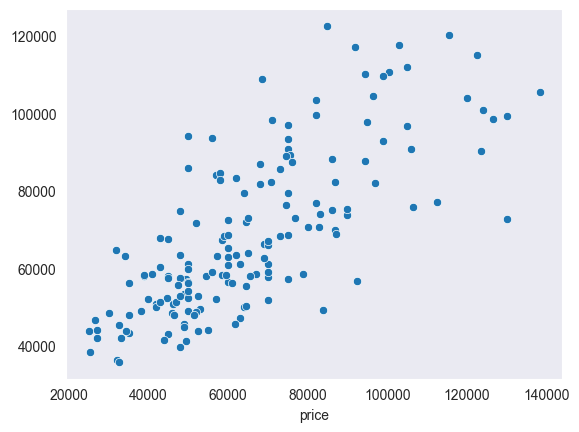

In [91]:
# To check the quality of our model, let's plot it
sns.scatterplot(x= y_test, y= predictions)

In [92]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
import numpy as np
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 13024.051577659171
MSE : 272384930.10196674
RMSE : 16504.08828448172


In [93]:
#accuracy of test data
score = lm.score(X_test, y_test)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,predictions)), 2))

Accuracy:  53.8
RMSE:      16504.09


In [94]:
#accuracy of test data
score = lm.score(X_train, y_train)
print("Accuracy: ", round(score*100, 2))
#print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,predictions)), 2))

Accuracy:  61.99
